# Practical math for Deep Learning
# 딥러닝을 위한 수학
Seongtae Kim, Computational Linguistics, Korea University

# 텐서 생성하기(Creating Tensors)

**발췌: 딥러닝에 목마른 사람들을 위한 Pytorch**<br>
![Image](https://user-images.githubusercontent.com/21074282/59833505-25750100-9381-11e9-9f82-f1dcb68faa20.jpg)

텐서를 생성하고 표시하는데 필요한 패키지들을 불러옵니다.

In [1]:
# 필요한 패키지: Pytorch, numpy, matplotlib
import torch 
import numpy as np
import matplotlib.pyplot as plt

텐서를 시각화하는 함수를 선언합니다.

In [4]:
# Seongtae Kim 2020-01-20
def tensor_draw(ten, title=""): #3차원까지만 생성가능, 소수점의 경우 정수로 변환
    if ten.type() == 'torch.FloatTensor': # float의 경우 정수로 변환
        data = ten.int().numpy()
    else:
        data = ten.numpy()
    if len(ten.size()) == 3:  # 3차원 텐서의 경우
        for a in range(len(data)):
            fig, ax = plt.subplots()
            for (b, c), z in np.ndenumerate(data[a]):
                ax.matshow(data[a])
                ax.text(c, b, '{:d}'.format(z), ha='center', va='center', fontsize=15)
            plt.title(title)
            plt.axis("off")
            plt.show()   
    elif len(ten.size()) <= 2: # 2차원의 경우
        if len(ten.size()) == 0: # 스칼라일 경우
            data = ten.int().unsqueeze(0).unsqueeze(0).numpy()
        elif len(ten.size()) == 1: # 벡터의 경우
            data = ten.int().unsqueeze(0).numpy()
        fig, ax = plt.subplots()
        for (a, b), z in np.ndenumerate(data):
            ax.matshow(data)
            ax.text(b, a, '{:d}'.format(z), ha='center', va='center', fontsize=15)
        plt.title(title)
        plt.axis("off")
        plt.show()
        

## 텐서 생성 기본

tensor([[7., 3., 2.],
        [8., 9., 1.]])


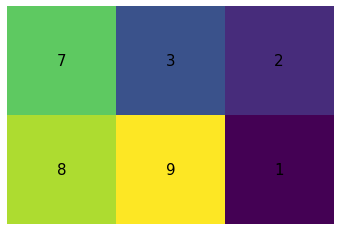

In [7]:
#plt.grid(None)
# 텐서 생성하기 기본
tensor_1 = torch.Tensor([[7, 3, 2], [8, 9, 1]]) # 2차원 행렬
print(tensor_1)
tensor_draw(tensor_1)

## 텐서 자동 생성

tensor([[0.5174, 0.9688, 0.1389],
        [0.8173, 0.4091, 0.6359]])
tensor([[1, 1, 1, 2],
        [6, 2, 6, 5],
        [1, 7, 3, 7],
        [8, 8, 1, 4]])


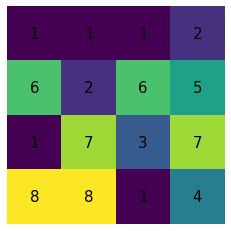

In [8]:
# 의사난수로 텐서 생성
tensor_3 = torch.rand(2, 3) # 2행 3열의 난수 텐서 생성
print(tensor_3)

# 최솟값 1, 최댓값 10, 4x4사이즈로 된 정수로 이루어진 의사 난수 텐서 생성
tensor_4 = torch.randint(low=1, high=10, size=(4,4)) 
print(tensor_4)
tensor_draw(tensor_4)

# 텐서 조작&연산하기 (Manipulating & Operating Tensors)

## 텐서 슬라이싱(Slicing a tensor)

텐서 슬라이싱을 시각화하는 함수

In [9]:
# 교재에 있는 함수는 3차원 텐서 전용이기에 수정함
import matplotlib.pyplot as plt
def show_slice(slc):
    if len(slc.size()) > 2: # 3차원 이상일 경우
        fig, axes = plt.subplots(len(slc), 1)
        for i in range(len(slc)):
            axes[i].matshow(slc.numpy()[i], vmin=0, vmax=1, cmap='spring')
    else: # 2차원일 경우
        fig, axes = plt.subplots()
        axes.matshow(slc.numpy(), vmin=0, vmax=1, cmap='summer')
    plt.show()

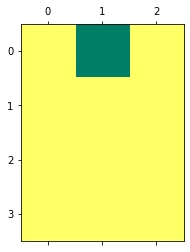

In [10]:
# 4x3 사이즈의 텐서 만들기
tensor_10 = torch.randint(low=0, high=9, size=(4, 3))
slc = torch.ones_like(tensor_10)
slc[0,1] = 0  # 1번째 행의 2번째 열을 선택
show_slice(slc)

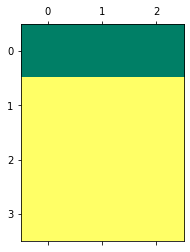

In [11]:
slc = torch.ones_like(tensor_10)
slc[0,:] = 0  # 1번째 행 모두를 선택
show_slice(slc)

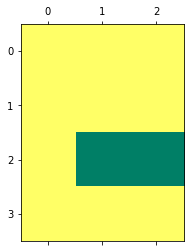

In [12]:
slc = torch.ones_like(tensor_10)
slc[2,1:] = 0  # 3번째 행의 2번째 열부터 끝까지 선택
show_slice(slc)

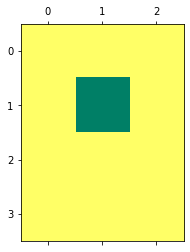

In [13]:
slc = torch.ones_like(tensor_10)
slc[1,1:2] = 0  # 2번째 행의 2번째 열만 선택
show_slice(slc)

## 텐서 View 연산

view 연산을 수행하기 전: 5x4 사이즈


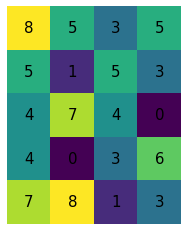

view 연산을 수행한 후: 2x10 사이즈


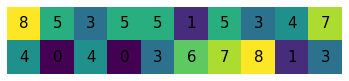

In [16]:
tensor_11 = torch.randint(low=0, high=9, size=(5,4))
print("view 연산을 수행하기 전: 5x4 사이즈")
tensor_draw(tensor_11) # 5x4의 크기를 가짐
print("view 연산을 수행한 후: 2x10 사이즈") # 각 텐서의 요소가 이어붙여짐
tensor_draw(tensor_11.view(2, -1))

## 텐서 Transpose 연산

전체 전치행렬 수행 전


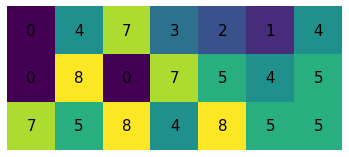

전체 전치행렬 수행 후


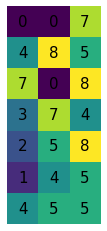

In [29]:
tensor_12 = torch.randint(low=0, high=9, size=(3,7))
print("전체 전치행렬 수행 전")
tensor_draw(tensor_12)
print("전체 전치행렬 수행 후")
tensor_draw(tensor_12.t())

## 텐서 Concatenation 연산

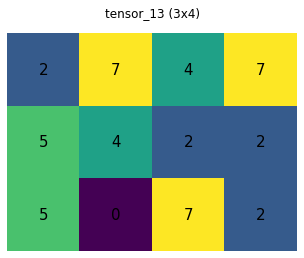

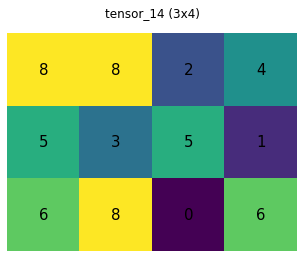

첫번째 차원을 기준으로 tensor_13과 tensor_14를 이으면 (6x4)


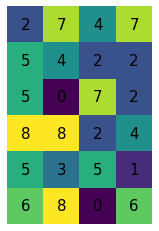

두번째 차원을 기준으로 tensor_18과 tensor_19를 이으면 (3x8)


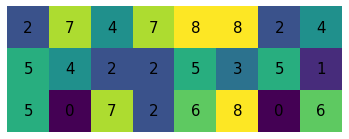

In [17]:
tensor_13 = torch.randint(low=0, high=9, size=(3,4))
tensor_14 = torch.randint(low=0, high=9, size=(3,4))

tensor_draw(tensor_13, "tensor_13 (3x4)")
tensor_draw(tensor_14, "tensor_14 (3x4)")
print("첫번째 차원을 기준으로 tensor_13과 tensor_14를 이으면 (6x4)")
tensor_draw(torch.cat([tensor_13, tensor_14], dim=0))
print("두번째 차원을 기준으로 tensor_18과 tensor_19를 이으면 (3x8)")
tensor_draw(torch.cat([tensor_13, tensor_14], dim=1))


## 텐서 Stack 연산

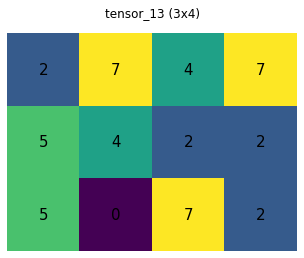

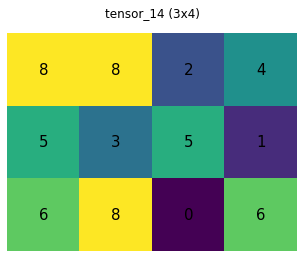

첫번째 차원을 기준으로 tensor_13과 tensor_14를 stack하면 (1x3x4)


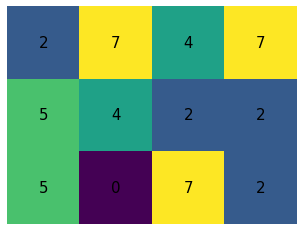

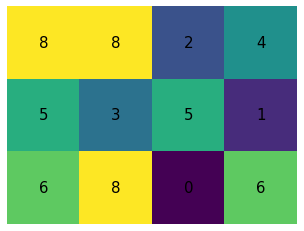

In [18]:
tensor_draw(tensor_13, "tensor_13 (3x4)")
tensor_draw(tensor_14, "tensor_14 (3x4)")

print("첫번째 차원을 기준으로 tensor_13과 tensor_14를 stack하면 (1x3x4)")
tensor_draw(torch.stack([tensor_13, tensor_14], dim=0))

## 텐서간 연산(Operations between Tensors)

### 텐서의 덧셈(Add between tensors)

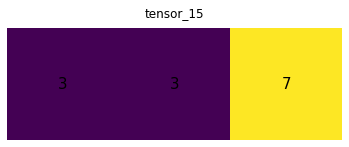

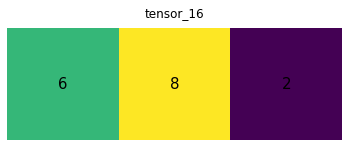

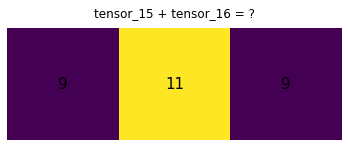

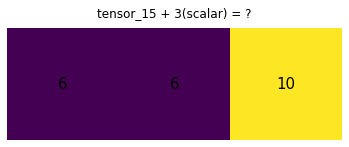

In [20]:
tensor_15 = torch.randint(low=1, high=9, size=(1,3))
tensor_16 = torch.randint(low=1, high=9, size=(1,3))
tensor_draw(tensor_15, "tensor_15")
tensor_draw(tensor_16, "tensor_16")
tensor_draw(torch.add(tensor_15, tensor_16), "tensor_15 + tensor_16 = ?")
tensor_draw(tensor_15 + 3, "tensor_15 + 3(scalar) = ?")

### 텐서의 원소단위 곱(Hadamard Product)

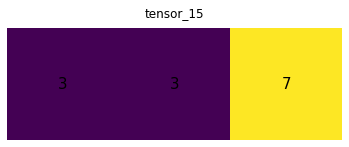

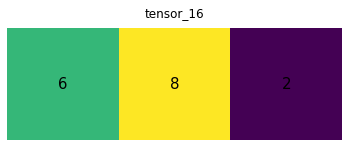

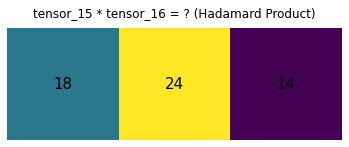

In [21]:
tensor_draw(tensor_15, "tensor_15")
tensor_draw(tensor_16, "tensor_16")
tensor_draw(tensor_15 * tensor_16, "tensor_15 * tensor_16 = ? (Hadamard Product)")

### 텐서의 내적(Inner product)

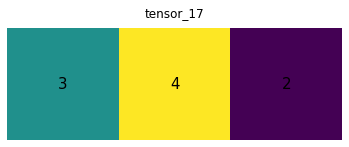

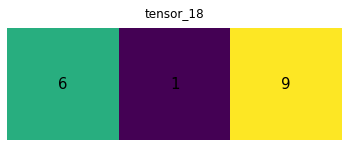

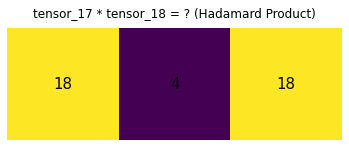

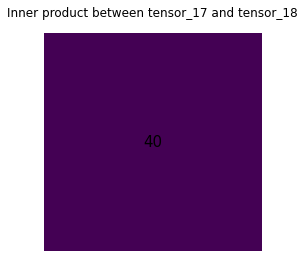

In [22]:
tensor_17 = torch.Tensor([3, 4, 2])
tensor_18 = torch.Tensor([6, 1, 9])

tensor_draw(tensor_17, "tensor_17")
tensor_draw(tensor_18, "tensor_18")
tensor_draw(tensor_17 * tensor_18, "tensor_17 * tensor_18 = ? (Hadamard Product)")
tensor_draw(tensor_17.dot(tensor_18), "Inner product between tensor_17 and tensor_18")

### 텐서간의 곱(Tensor Multiplication)

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Matrix_multiplication_qtl1.svg/1920px-Matrix_multiplication_qtl1.svg.png)

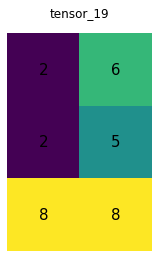

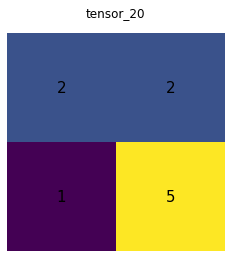

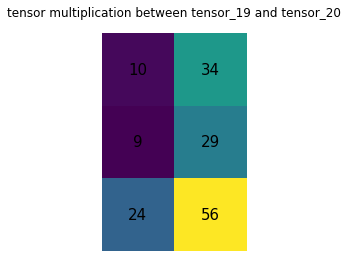

In [23]:
tensor_19 = torch.randint(low=1, high=9, size=(3,2))
tensor_20 = torch.randint(low=1, high=9, size=(2,2))

tensor_draw(tensor_19, "tensor_19")
tensor_draw(tensor_20, "tensor_20")
tensor_draw(tensor_19.mm(tensor_20), "tensor multiplication between tensor_19 and tensor_20")

### 텐서의 총합(Sum of Tensor elements)

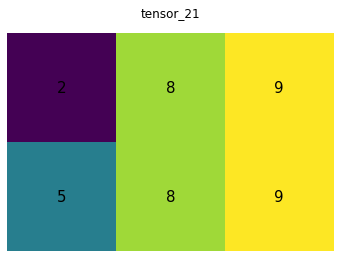

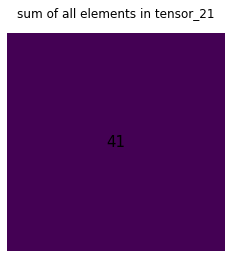

In [24]:
tensor_21 = torch.randint(low=1, high=10, size=(2,3))

tensor_draw(tensor_21, "tensor_21")
tensor_draw(torch.sum(tensor_21), "sum of all elements in tensor_21")

### 텐서의 최댓값/최솟값 (Max/ Min Value within a tensor)

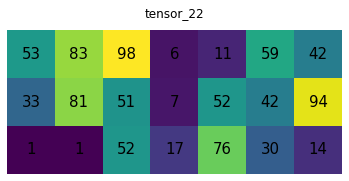

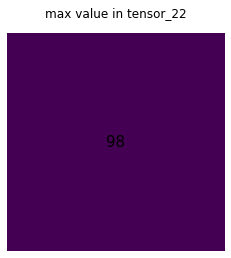

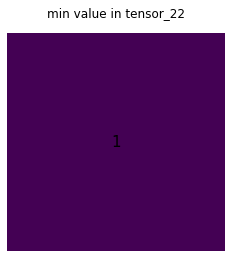

In [25]:
tensor_22 = torch.randint(low=1, high=99, size=(3,7))

tensor_draw(tensor_22, "tensor_22")
tensor_draw(torch.max(tensor_22), "max value in tensor_22")
tensor_draw(torch.min(tensor_22), "min value in tensor_22")

----------

# 나이브 베이즈 분류기(Naive Bayes Classifier)

**키워드**<br>
- 베이즈 정리<br>
- 베이즈 정리 확률 모델<br>
- 다항분포 나이브 베이즈<br>
- TF-IDF<br>


![Image](https://www.elmhurst.edu/wp-content/uploads/2019/08/amazing-thomas-bayes-illustration.jpg)

베이즈 확률론(Bayesian Probability)은 빈도(frequency)나 경향성(propensity)를 중심으로 시스템의 물리적인 속성으로만 생각하던 기존의 확률론에서 탈피해 확률을 "지식 또는 믿음의 정도를 나타내는 양"으로 해석하는 확률론이다. 이 분야의 선구자인 18세기 통계학자 토머스 베이즈(Thomas Bayses)의 이름을 따서 명명되었다.

---------

### 베이안 확률 모델(Bayesian Model)

베이지안 확률 모델은 확률 분포를 이용한 모델이다.

Naive Bayes 분류기에서 모든 특성값은 서로 독립적임을 가정한다. 즉 특성간에 어떠한 연관성도 없다는 것을 가정하고 각 특성이 독립적으로 어떤 분류를 만들어 내는 것으로 간주.

![Image](https://i.pinimg.com/originals/2a/51/32/2a5132bc6948097eb871d51820b938ab.jpg)

간단한 예를 들어 바구니 속의 과일을 분류하는 규칙을 만든다고 가정해보자.

여러 종류의 과일들이 있을 때 특정 범주(Category) "사과"를 식으로 표현하면 $ \ C_k $와 같이 표현할 수 있다.
<br>
이 때, $ \ C_k $ 혹은 사과를 구성하는 독립적인 특징들(독립변수)을 생각해 볼 수 있다.<br>
예를 들면 "색깔", "모양", "크기" 등이 있을 수 있다. 각각의 요소들을 벡터로 표현하면 다음과 같이 표기할 수 있다.<br>
<br>
\begin{equation} \ x=(x_1,...,x_n) \end{equation}
<br>
이 때 독립변수들이 "사과($ \ C_k $)"로 분류될 수 있는 확률은 사과를 구성하는 각각의 특징들(색깔, 모양, 크기)의 확률값에 달려있다. 그래서

\begin{equation*}
p(C_k | x_1, ..., x_n) 
\end{equation*}

다음과 같은 식으로 표현할 수 있다. 여기서 각각의 $ \ x_i $들은 "색깔", "모양", "크기"와 같이 해당 분류를 구성하는 독립변수들이다. 해당 공식은 하지만 독립변수가 많을 경우 베이지안 모델을 바로 적용할 수 없다. 그러므로 위 식은 베이즈 정리와 조건부 확률을 이용하여 다음과 같이 정리 가능하다.

\begin{equation*} p(c_k|x) = \frac{p(C_k)p(x|C_k)}{p(x)} \end{equation*}

**베이즈 정리는 두 확률 변수 $C_k$와 $x$ 사이의 사전 확률과 사후 확률 사이의 관계를 우도로 나타내준다.** 즉 사전 확률과 사후확률이 데이터에서 주어진다면 우도 확률을 구할 수 있다.

해당 식을 Bayesian Probability에서 사용하는 용어를 기준으로 바꾸면 다음과 같다.<br><br> \begin{equation} posterior = \frac{prior \times likelihood}{evidence} \end{equation}

(posterior: 사후확률 / prior: 사전확률 / likelihood:우도(가능도) / evidence:관찰값)<br><br>
**사전확률**: 사건 $\ x$가 발생하기 이전에 갖고 있던 사전 $ \ C_k $의 확률 -> $\ p(C_k)$<br>
**사후확률**: 사전확률에서 사건 $\ x$가 발생하고 이 정보를 반영한 사건 A의 확률 -> $ \ p(c_k|x)$<br><br>
\begin{equation} 사후확률 = 사전확률 \times \frac{P(x|C_k)}{P(x)} \end{equation}<br>
**우도(가능도)**: 위의 식에서 $\ P(x|C_k) $<br>
**관찰값(정규화 상수)**: 위의 식에서 $\ P(x)$<br>

\begin{equation*} p(C_k|x) = \frac{p(C_k)p(x|C_k)}{p(x)} \end{equation*}

실제로 위 식에서 분모 부분은 필요가 없다. 분모 값은 $ \ C_k $ 확률에 의해 값이 정해지지 않기 때문

\begin{equation*} p(C_k|x) = \ p(C_k)p(x|C_k) \end{equation*}

다음 우도 $\ p(x|C_k)$에서 $\ x$는 $ \ x_1,...,x_n$를 가리켰었다. 이 때  조건부 확률 연쇄 법칙을 사용하여 다음과 같이 다시 쓸 수 있다.

\begin{equation} \ p(C_k)p(x_1,...,x_n|C_k) \end{equation}<br>
\begin{equation} \ p(C_k) p(x_1|C_k) p(x_2|C_k, x_1) ... p(x_n|C_k, x_1, x_2 ... x_{n-1}) \end{equation}

즉 어떤 과일의 "색깔", "모양", "크기"가 주어졌을 때 그것을 "사과"로 분류할 확률 $p(C_k|x)$ 은 <br>
역으로 사과라고 분류를 했을 때의 확률 $p(C_k)$과<br>
사과라는 분류가 주어졌을 때 해당 "색깔"이 주어질 확률 $p(x_1|C_k)$,<br>
색깔과 사과라는 분류가 주어졌을 때 해당 "모양"이 나타날 확률 $p(x_2|C_k, x_1)$ 등등<br>
이어져 나가는 모든 사건의 곱사건이라고 할 수 있다..

하지만 이때 "색깔"과 "모양", "크기"와 같은 모든 특징들을 $F_i$라고 했을 때 각각의 특징들은 독립적이므로 이와같이 다시 정의할 수 있다.

\begin{equation} \ p(C_k) p(x_1|C_k) p(x_2|C_k) ... p(x_n|C_k) \end{equation}

정리하자면 식은 다음과 같이 정리될 수 있다.

\begin{equation} p(C_k) \prod_{i=1}^{n}p(x_i|C_k) \end{equation}

-----

### 확률 모델로부터의 분류기 생성

나이브 베이즈 분류는 이 확률 모델과 결정 규칙을 조합한다. 즉 나이브 베이즈 분류에서는 클래스 k, 즉 $C_k$에 대해서 다음 식을 통해 최대 확률을 갖는 클래스 k를 찾아낸다.

\begin{equation} \hat{y}=\operatorname*{argmax}_{k\in(1, ...,K)} p(C_k) \prod_{i=1}^{n}p(x_i|C_k) \end{equation}

즉 각 특징들이 주어졌을 때 가장 큰 확률로 일치하는 분류를 뱉어낸다는 의미

----------------

### 나이브 베이즈 분류 모형

사이킷런의 naive_bayes 서브 패키지에서는 다음 3가지 나이브베이즈 모형 클래스를 제공한다.

1. 정규분포 나이브베이즈(GaussianNB)<br>
    연속적인 값을 지닌 데이터를 처리할때 사용
2. **다항분포 나이브베이즈(MultinomialNB)**<br>
    문서 분류에 사용
3. 베르누이분포 나이브베이즈(BernoulliNB)<br>
    짧은 텍스트를 분류할 때, 용어의 부재를 명시적으로 모델링할 때 사용

이 중에서 우리는 다항분포 나이브 베이즈만 볼 예정

### 다항분포 나이브 베이즈(Multinomial Naive Bayes)

다항 분포란 여러개의 값을 가질수 있는 독립 확률변수들에 대한 확률 분포이다.

다항 분포 나이브 베이즈는 한 문서에서 특정 단어의 출현을 나타내는 여러 사건(다항)을 가지고 문서를 분류하는데 사용되는 모델이다.

다음은 다항분포 나이브 베이즈의 의사 코드(pseudocode)이다.

![Image](http://docs.likejazz.com/images/2017/multinomialnb.png)


## 나이브 베이즈 분류기의 장점
<br>
1. 간단하고 구현이 쉽다.<br>
2. 훈련 데이터가 작아도 된다.<br>
3. 연속적이거나 불연속적인 데이터를 모두 처리할 수 있다.<br>
4. 속도가 빠르기에 실시간 예측에 사용됨<br>
5. 관계가 없는 특징에 민감하게 반응하지 않음<br>

각 단어가 독립적이라는 것을 가정하기 때문에 나이브 베이즈 분류기는 Bag of Words와 본질적으로 같은 접근을 취함(범주가 주어졌을 때 각 단어가 나타날 확률(우도)의 연쇄곱으로 판단하기 때문) -> a$\times$b나 b$\times$a는 같기 때문에 단어의 등장 순서는 무시<br>
<br>
나이브 베이즈 분류기는 언어모델에서 유니그램(Unigram)과 같다. 유니그램은 임의의 문자열이 주어졌을 때 범주별 각 단어의 등장 확률을 연속적으로 곱해 해당 문자열이 나타날 확률을 계산함 나이브 베이즈 모델은 사전확률을 추가적으로 곱한다는 것만 차이가 있음

 

## 텍스트 분류(Text Classification)

필요한 패키지들을 불러옵니다.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## 데이터 불러오기(Loading data)

sklearn에서 뉴스 데이터들을 훈련 데이터와 테스트 데이터로 각각 불러옵니다.

In [2]:
# 모든 카테고리들 목록
categories = ['alt.atheism',
     'comp.graphics',
     'comp.os.ms-windows.misc',
     'comp.sys.ibm.pc.hardware',
     'comp.sys.mac.hardware',
     'comp.windows.x',
     'misc.forsale',
     'rec.autos',
     'rec.motorcycles',
     'rec.sport.baseball',
     'rec.sport.hockey',
     'sci.crypt',
     'sci.electronics',
     'sci.med',
     'sci.space',
     'soc.religion.christian',
     'talk.politics.guns',
     'talk.politics.mideast',
     'talk.politics.misc',
     'talk.religion.misc']

# 훈련 데이터 생성
train_data = fetch_20newsgroups(subset='train', categories=categories)
# 테스트 데이터 생성
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True)

In [3]:
# 훈련 데이터/테스트 데이터의 문서 수
print("훈련 데이터 문서 수: {}".format(len(train_data.data)))
print("테스트 데이터 문서 수: {}".format(len(test_data.data)))

훈련 데이터 문서 수: 11314
테스트 데이터 문서 수: 7532


In [4]:
all_data = fetch_20newsgroups(subset="all")
print("모든 문서의 카테고리 이름:\n", all_data.target_names)

모든 문서의 카테고리 이름:
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### 카테고리 분류; Categories(taget) classification
0. 'alt.atheism'<br>
1. 'comp.graphics'<br>
2. 'comp.os.ms-windows.misc'<br>
3. 'comp.sys.ibm.pc.hardware'<br>
4. 'comp.sys.mac.hardware'<br>
5. 'comp.windows.x'<br>
6. 'misc.forsale'<br>
7. 'rec.autos'<br>
8. 'rec.motorcycles'<br>
9. 'rec.sport.baseball'<br>
10. 'rec.sport.hockey'<br>
11. 'sci.crypt'<br>
12. 'sci.electronics'<br>
13. 'sci.med'<br>
14. 'sci.space'<br>
15. 'soc.religion.christian'<br>
16. 'talk.politics.guns'<br>
17. 'talk.politics.mideast'<br>
18. 'talk.politics.misc'<br>
19. 'talk.religion.misc'<br>

In [5]:
print(train_data.target[5])

16


In [6]:
# 훈련 데이터 샘플
print(train_data.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

## Step by Step

### Training data -> BoW(TDM) -> TF-IDF 측정

**TDM(Term Document Matrix)**<br>
문서 당의 단어들의 출현 빈도를 측정하여 만드는 matrix

**TF-IDF(Term Frequency-Inverse Document Frequency)**<br>
어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지 나타내는 통계적인 수치<br>
TF(Term Frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값 -> 이 값이 높을 수록 문서에서 중요한 것. <br>
IDF(Inverse Document Frequency)는 앞의 TF, 즉 DF(Document Frequency)의 역수를 의미한다.<br>




TF-IDF을 이용하면 여러 개의 문서 가운데 각 문서 내에 있는 색인어(term)의 가중치가 적용된 수치값을 부여할 수 있다. 계산을 통해 문서 내에서 상대적으로 더 중요한 단어가 어떤 것인지 알 수 있다.

In [50]:
# tdm: Term Document Matrix(Document-term matrix) = Bag of Words

tdmvector = CountVectorizer()
X_train_tdm = tdmvector.fit_transform(train_data.data)
print(X_train_tdm.shape)
# 11314: 문서의 개수 / 130107: term의 개수

(11314, 130107)


In [51]:
tfidf_transformer = TfidfTransformer()
tfidfv=tfidf_transformer.fit_transform(X_train_tdm)
print(tfidfv.shape)

(11314, 130107)


In [52]:
mod = MultinomialNB()
mod.fit(tfidfv, train_data.target)

MultinomialNB()

### Test data -> BoW(TDM) -> TF-IDF 측정

In [53]:
MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

MultinomialNB(alpha=0.1)

In [54]:
X_test_tdm = tdmvector.transform(test_data.data)

In [55]:
tfidfv_test = tfidf_transformer.transform(X_test_tdm)

### Prediction

In [56]:
predicted=mod.predict(tfidfv_test)
print("정확도:", accuracy_score(test_data.target, predicted))

정확도: 0.7738980350504514


## Make_pipeline

In [57]:
# 모델 생성
# TF-IDF(Term Frequency - Inverse Document Frequency)
# 여러 문서에서 <특정 단어>가 <특정 문서> 내에서 얼마나 중요한지를 가중치로 표시
#
# MultinomialNB -> Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [58]:
# 훈련 데이터로 모델 훈련
# train_data.data는 TfidfVectorizer()함수에 삽입
# 이후 데이터는 train_data.target을 정답지로 하여 MultinomialNB()에 삽입
model.fit(train_data.data, train_data.target)

# 테스트 데이터를 위한 라벨 생성
labels = model.predict(test_data.data)

## Heatmap visualization

Text(30.499999999999993, 0.5, 'Predicted Label')

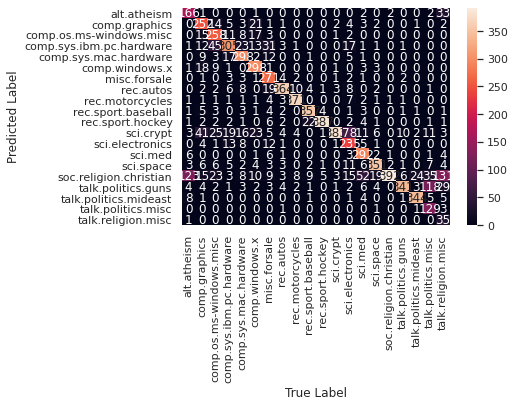

In [60]:
mat = confusion_matrix(test_data.target, labels)
sns.heatmap(mat.T, square=False, annot=True, fmt="d", cbar=True,
           xticklabels=train_data.target_names,
           yticklabels=test_data.target_names)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

## Test!

In [40]:
def predict_category(s, train=train_data, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [41]:
predict_category("Jesus Christ")

'soc.religion.christian'

In [42]:
predict_category("SpaceX launched a new rocketship")

'sci.space'

In [43]:
predict_category("Multisystem Inflammatory Syndrome in Children in New York State")

'sci.med'

In [46]:
predict_category("Apple")

'comp.sys.mac.hardware'

In [48]:
predict_category("Samsung")

'comp.sys.ibm.pc.hardware'

발췌: <br>
1. https://medium.com/@omicro03/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-18%EC%9D%BC%EC%B0%A8-%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98%EA%B8%B0-6bab2de8bb1f
2. https://en.wikipedia.org/wiki/Bayesian_probability
3. https://datascienceschool.net/view-notebook/c19b48e3c7b048668f2bb0a113bd25f7/
4. https://nlp.stanford.edu/IR-book/pdf/13bayes.pdf
5. https://ratsgo.github.io/machine%20learning/2017/05/18/naive/
6. https://euriion.com/?p=411929
7. https://ko.wikipedia.org/wiki/Tf-idf